# QCTO - Workplace Module

### Project Title: Cleaned River Water Project
#### Done By: Vuyiswa Ntshangase

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The purpose of this project is to analyze water quality data collected from a polluted river in Buenos Aires. By examining the water parameters, we aim to understand the extent of the pollution and gain insights into the water quality, which will inform potential environmental interventions. The project focuses on cleaning and preprocessing the data, performing exploratory data analysis (EDA), and preparing it for further modeling.
* **Details:** The data was collected from various points along the river, with samples taken and analyzed by a chemical lab. Key water quality parameters such as turbidity, total suspended solids (TSS), and hardness were measured. These parameters are crucial for understanding the overall health of the water and its suitability for various uses (e.g., consumption, irrigation, recreational use).
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The purpose of importing packages is to bring in the necessary libraries and tools required for data manipulation, analysis, and visualization. These packages will enable us to efficiently clean, preprocess, and explore the water quality dataset. By utilizing well-established Python libraries, we can leverage powerful functions to handle large datasets, perform statistical analysis, and create meaningful visualizations that help interpret the data.
* **Details:** In this step, we import the following packages:

Pandas: For data manipulation, cleaning, and processing. It allows us to load the dataset into a DataFrame, handle missing values, and perform various data transformations.

NumPy: For numerical operations, such as handling arrays, performing mathematical calculations, and working with numerical data.

Matplotlib and Seaborn: For creating visualizations like graphs and plots to explore data trends, distributions, and correlations.

Scikit-Learn: For data preprocessing tasks such as scaling, encoding, and preparing data for machine learning models.


---

In [4]:

import pandas as pd        
import numpy as np          
import matplotlib.pyplot as plt 
import seaborn as sns       
from sklearn.preprocessing import StandardScaler  
from sklearn.impute import SimpleImputer  


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The purpose of this section is to provide an overview of the river water quality dataset, describing how the data was collected, the methods used, and the main characteristics of the dataset.
* **Details:** The data for this project was collected from a polluted river located in Buenos Aires. The river water samples were extracted by a team of researchers who took the samples to a chemical lab for testing. The tests were designed to measure various water quality parameters, such as Turbidity, TSS (Total Suspended Solids), and Hardness. The data was manually recorded and stored in a CSV file format.
---

In [7]:
import pandas as pd

file_path = "River water parameters (1).csv"
df = pd.read_csv(file_path)

print("Dataset Information:")
df.info()

print("\nFirst 5 Rows of the Dataset:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    fl

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The purpose of loading data is to bring the raw dataset into the environment where it can be manipulated, analyzed, and processed. Loading the data properly is the first step in any data science project, as it allows us to start working with the information and begin exploring its structure, quality, and key features. Once loaded, we can perform data cleaning, exploratory analysis, and further processing tasks.
* **Details:** In this step, we load the dataset from an external source (e.g., CSV file) into a suitable data structure such as a Pandas DataFrame. This allows us to access and work with the data in an efficient and organized manner.

The data is typically stored in formats such as:

CSV (Comma Separated Values) files, which are widely used for tabular data.

Excel files, which can also contain data in a tabular form.

JSON, SQL databases, or APIs can also be used for loading data, depending on the format and source
---

In [14]:
import pandas as pd


file_path = "Cleaned_River_Water_Data.csv"  
df = pd.read_csv(file_path)


df.head()


,Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC (µS/cm),TDS (mg/L),TSS (mL sed/L),DO (mg/L),Level (cm),Turbidity (NTU),Hardness (mg CaCO3/L),Hardness classification,Total Cl- (mg Cl-/L),Date,Time
0,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,144.954083,147.0,BLANDA,156.0,2023-05-09,14:15:00
1,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.200000,94.0,BLANDA,78.0,2023-06-14,14:30:00
2,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.900000,86.0,BLANDA,82.0,2023-06-14,14:30:00
3,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NaN,30.700000,200.0,SEMIDURA,117.0,2023-06-14,15:00:00
4,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NaN,25.600000,196.0,SEMIDURA,117.0,2023-06-14,15:00:00


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The purpose of data cleaning and filtering is to ensure that the dataset is in a format suitable for analysis. Raw data often contains errors, inconsistencies, or irrelevant information that can distort the analysis or lead to incorrect conclusions. By cleaning and filtering the data, we remove or correct these issues, making the data more reliable and accurate. This step is essential to ensure the integrity of the analysis, as poor-quality data can undermine the validity of any insights derived.
* **Details:** Data cleaning and filtering involve several tasks:

Handling Missing Values: Missing or null values can arise in any dataset. We may choose to:

Remove rows or columns containing missing values.

Replace missing values with imputation techniques such as mean, median, or mode.

Use domain-specific approaches if there is prior knowledge about the data.

Removing Duplicates: Duplicate rows can occur during data collection or merging. These need to be removed to ensure that we do not over-represent certain observations in our analysis.

Data Type Conversion: Sometimes, data may be stored in an inappropriate format. For example:

Numerical values may be stored as strings.

Date values may need to be converted into a datetime format for proper analysis.

Filtering Outliers: Outliers are data points that fall outside a specified range. Depending on the context, they may need to be removed, especially if they are errors or do not represent real-world phenomena.

Handling Inconsistent Data: This involves standardizing the values in the dataset.
---

In [16]:
# Standardize column names (remove spaces and special characters)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w\s]', '')

# Handle missing values by filling them with the column mean (for numerical columns)
df = df.fillna(df.mean(numeric_only=True))

# Remove duplicate rows
df = df.drop_duplicates()

# Convert date column to datetime format if applicable
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Display updated dataset information
print("Updated Dataset Information:")
df.info()

print("\nFirst 5 Rows After Cleaning:")
print(df.head())


Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   sampling_point            219 non-null    object        
 1   ambient_temperature_(°c)  219 non-null    float64       
 2   ambient_humidity          219 non-null    float64       
 3   sample_temperature_(°c)   219 non-null    float64       
 4   ph                        219 non-null    float64       
 5   ec_(µs/cm)                219 non-null    int64         
 6   tds_(mg/l)                219 non-null    int64         
 7   tss_(ml_sed/l)            219 non-null    float64       
 8   do_(mg/l)                 219 non-null    float64       
 9   level_(cm)                219 non-null    float64       
 10  turbidity_(ntu)           219 non-null    float64       
 11  hardness_(mg_caco3/l)     219 non-null    float64      

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The purpose of Exploratory Data Analysis (EDA) is to gain a better understanding of the dataset by summarizing its main characteristics and uncovering patterns, trends, and relationships between variables. EDA helps identify key insights that can guide further analysis or modeling. It is a crucial step before building any machine learning models, as it helps to understand the distribution of data, detect anomalies, and formulate hypotheses for deeper analysis.
* **Details:** Summary Statistics: I used basic statistics, such as the mean, median, mode, standard deviation, and percentiles, to understand the central tendency and spread of numerical variables.

Histograms: Used to examine the distribution of a single variable.

Box Plots: Help identify outliers and understand the spread and symmetry of data.

Correlation Matrices: Allow us to explore relationships between different variables.

Pair Plots: Show relationships between pairs of numerical variables.
Data Visualization: Visualization techniques such as histograms, box plots, scatter plots, and correlation matrices are used to reveal patterns, trends, and potential relationships between variables. This makes it easier to identify outliers, skewness, and correlations.
---


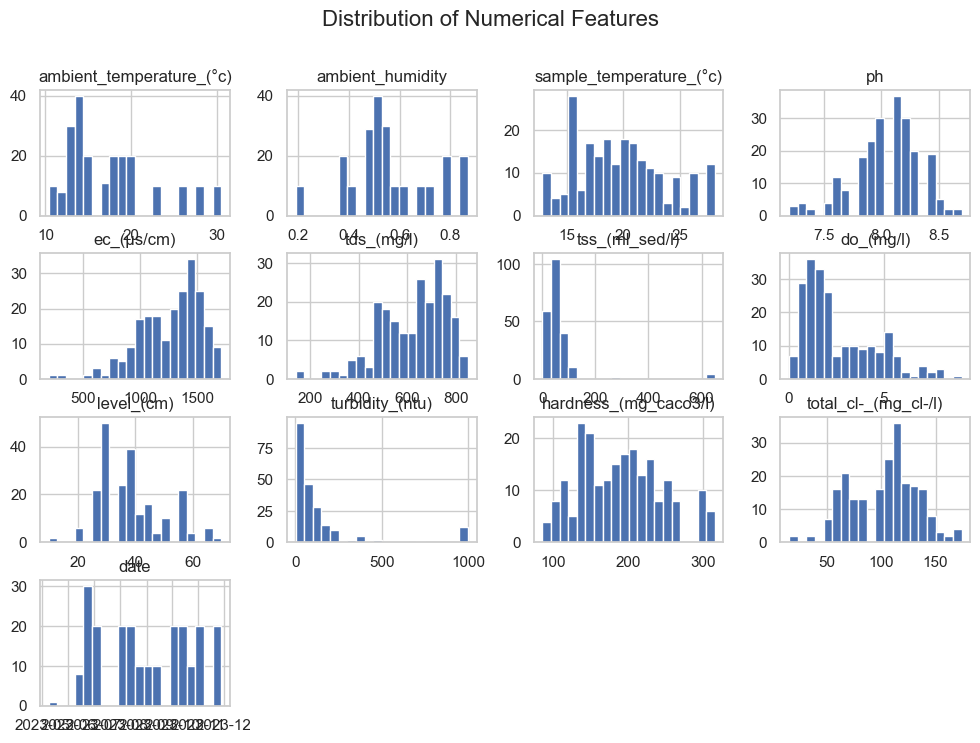

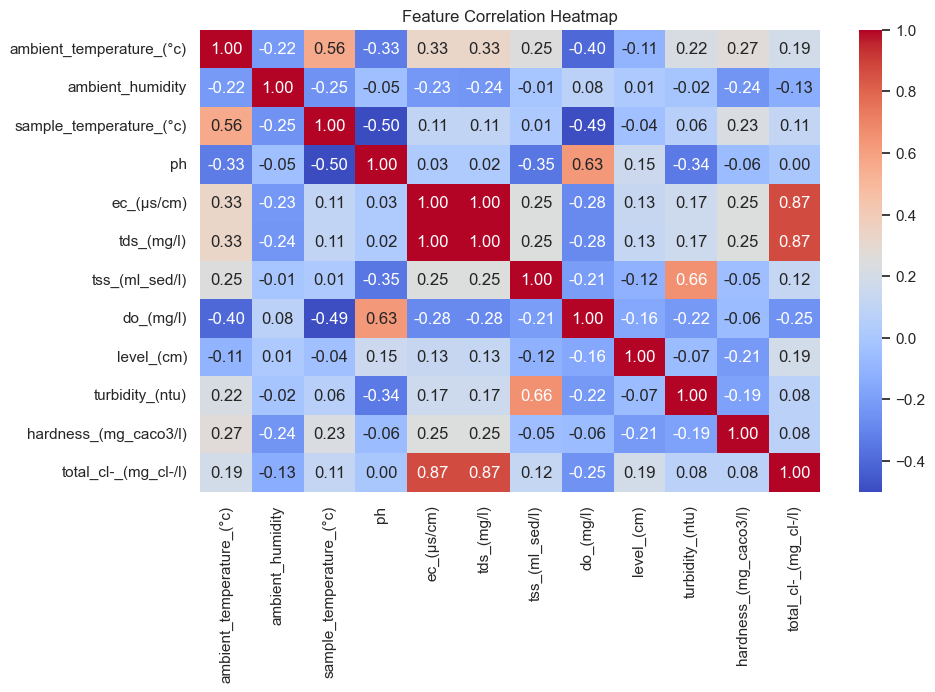

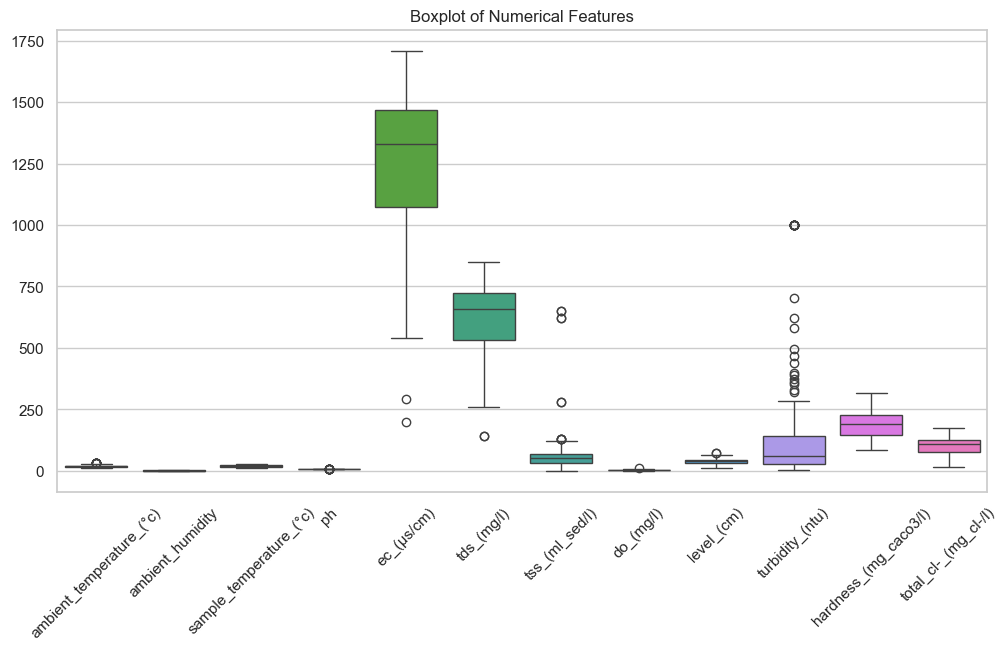

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Check distribution of numerical variables
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# Check correlations between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot to detect outliers in key parameters
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


---
<a href=#six></a>
## **Data Preprocessing**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Data preprocessing is all about getting your data ready for analysis or machine learning. The raw data you get is usually messy, with missing values, outliers, and random stuff that doesn’t make sense. Preprocessing is the step where we clean up the data, fix issues, and get it into a state where it can actually be useful for analysis. If we don’t do this step, our results might be off, and the models we create won’t work as well.
* **Details:** Data preprocessing involves cleaning up and preparing data for analysis by:

Fixing Missing Values: Filling in or removing missing data.

Feature Scaling: Standardizing data ranges so everything is on the same scale.

Converting Categorical Data: Turning text labels into numbers.

Creating New Features: Combining data to make better features for analysis.

Dealing with Outliers: Removing or adjusting extreme values that could affect results.

Transforming Data: Applying techniques (like log transformations) to make data easier to analyze.

Splitting the Data: Dividing the data into training and testing sets for modeling.

Selecting Features: Choosing the most important features to improve the model.
---


In [9]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = df.select_dtypes(include=['number']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("First 5 Rows After Scaling:")
print(df.head())


First 5 Rows After Scaling:
  Date (DD/MM/YYYY) Time (24 hrs XX:XX)     Sampling point  \
0        09/05/2023               14:15      Puente Bilbao   
1        14/06/2023               14:30      Puente Bilbao   
2        14/06/2023               14:30      Puente Bilbao   
3        14/06/2023               15:00  Arroyo_Las Torres   
4        14/06/2023               15:00  Arroyo_Las Torres   

   Ambient temperature (°C)  Ambient humidity  Sample temperature (°C)  \
0                 -0.124258         -0.545424                -0.153882   
1                 -1.114158         -0.545424                -1.705688   
2                 -1.114158         -0.545424                -1.705688   
3                 -1.114158         -0.545424                -1.705688   
4                 -1.114158         -0.545424                -1.705688   

         pH  EC\n(µS/cm)  TDS\n(mg/L)  TSS\n(mL sed/L)  DO\n(mg/L)  \
0  0.927990     1.340081     1.373600        -0.681584    0.859872   
1  0.236732   

## Project Links

- [GitHub Repository](https://github.com/VuyiswaN/Cleaned-River-Water-Project)
- [Trello Board](https://trello.com/b/Ry0a9bDC/contaminated-water-vuyiswa-ntshangase-project-internship)
- [Project Presentation](https://www.canva.com/design/DAGjwzFXpiA/pVUfvSH-LRJruipmCGeGjw/edit?utm_content=DAGjwzFXpiA&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

---
<a href=#seven></a>
## **Statistical Data Analysis Process**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Statistical analysis helps us understand patterns, trends, and relationships in the dataset. It allows us to summarize key information, check for correlations, and determine whether any important insights can be drawn from the data.
* **Details:** Descriptive Statistics: Summarizing the dataset using measures like mean, median, mode, standard deviation, and range to understand its distribution.

Correlation Analysis: Checking relationships between variables to see if changes in one factor affect another.

Hypothesis Testing: Using statistical tests (like t-tests or ANOVA) to check if differences between groups are significant.

Distribution Analysis: Understanding how data points are spread using histograms, density plots, or probability distributions.

Outlier Detection: Identifying and handling extreme values that might affect the results.

Inferential Statistics: Making predictions or generalizations about a population based on a sample.
---

In [14]:
import pandas as pd

file_path = r"C:\Users\DELL\OneDrive\Documents\INTERNSHIP PROJECT MARCH 2025\Cleaned_River_Water_Data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the data to confirm it loaded
df.head()



,Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC (µS/cm),TDS (mg/L),TSS (mL sed/L),DO (mg/L),Level (cm),Turbidity (NTU),Hardness (mg CaCO3/L),Hardness classification,Total Cl- (mg Cl-/L),Date,Time
0,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,144.954083,147.0,BLANDA,156.0,2023-05-09,14:15:00
1,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.200000,94.0,BLANDA,78.0,2023-06-14,14:30:00
2,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.900000,86.0,BLANDA,82.0,2023-06-14,14:30:00
3,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NaN,30.700000,200.0,SEMIDURA,117.0,2023-06-14,15:00:00
4,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NaN,25.600000,196.0,SEMIDURA,117.0,2023-06-14,15:00:00


In [16]:
# Descriptive statistics
df.describe()


,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC (µS/cm),TDS (mg/L),TSS (mL sed/L),DO (mg/L),Level (cm),Turbidity (NTU),Hardness (mg CaCO3/L),Total Cl- (mg Cl-/L)
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,180.000000,219.000000,219.000000,219.000000
mean,17.640183,0.559954,19.594977,8.031507,1264.566210,624.246575,61.015023,2.620639,38.277778,144.954083,190.714286,102.629108
std,5.163841,0.165303,3.875319,0.289991,273.320004,135.540892,85.876387,1.957510,12.532887,234.051882,55.801018,32.330979
min,10.400000,0.190000,12.800000,7.200000,200.000000,140.000000,0.100000,0.000000,10.000000,1.060000,86.000000,15.000000
25%,13.800000,0.470000,16.800000,7.900000,1075.000000,530.000000,30.000000,1.170000,30.000000,27.600000,146.000000,76.000000
50%,17.000000,0.540000,19.300000,8.100000,1330.000000,660.000000,50.000000,1.870000,35.000000,59.800000,188.000000,109.000000
75%,20.000000,0.690000,22.100000,8.200000,1470.000000,725.000000,66.000000,4.000000,48.000000,140.977041,228.000000,124.000000
max,30.500000,0.870000,28.100000,8.700000,1710.000000,850.000000,650.000000,9.120000,70.000000,1000.000000,316.000000,174.000000


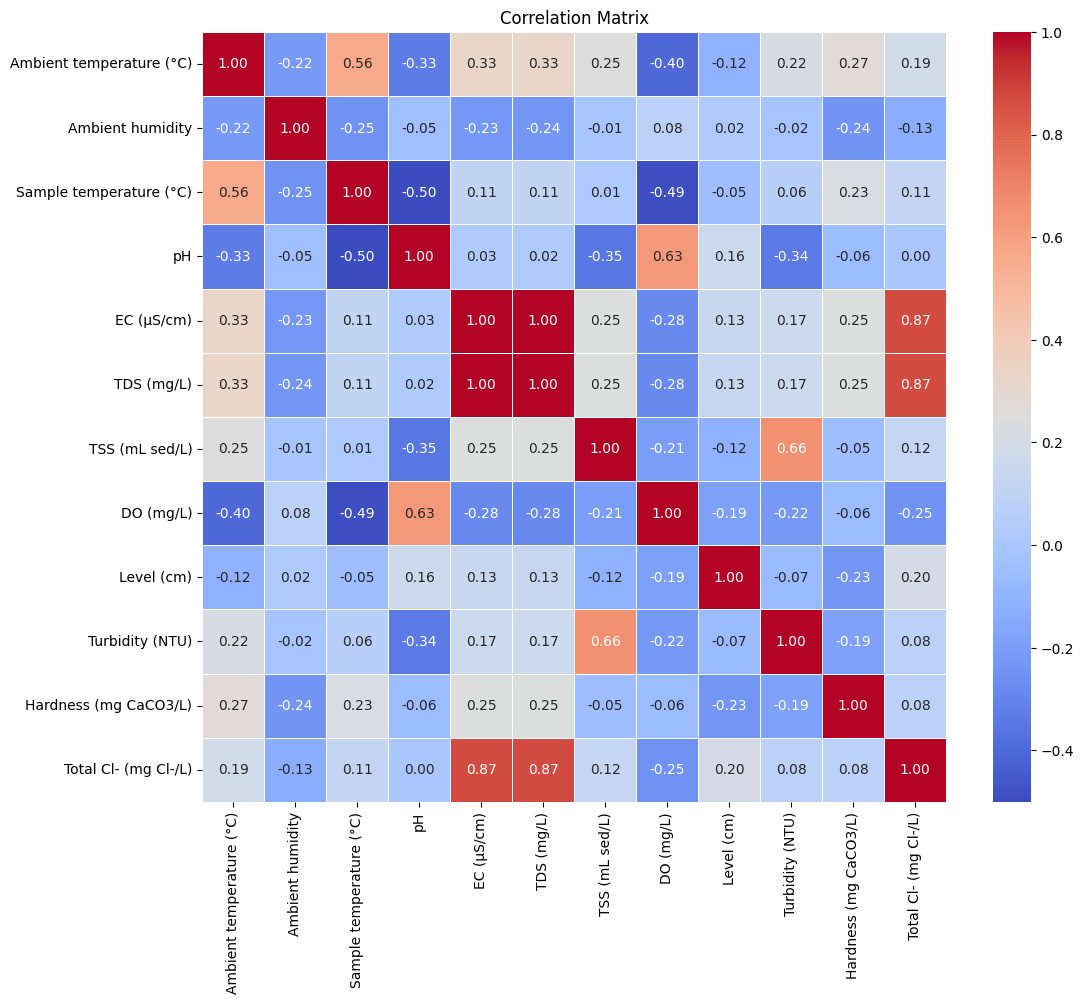

In [20]:
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
corr_matrix = numeric_columns.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



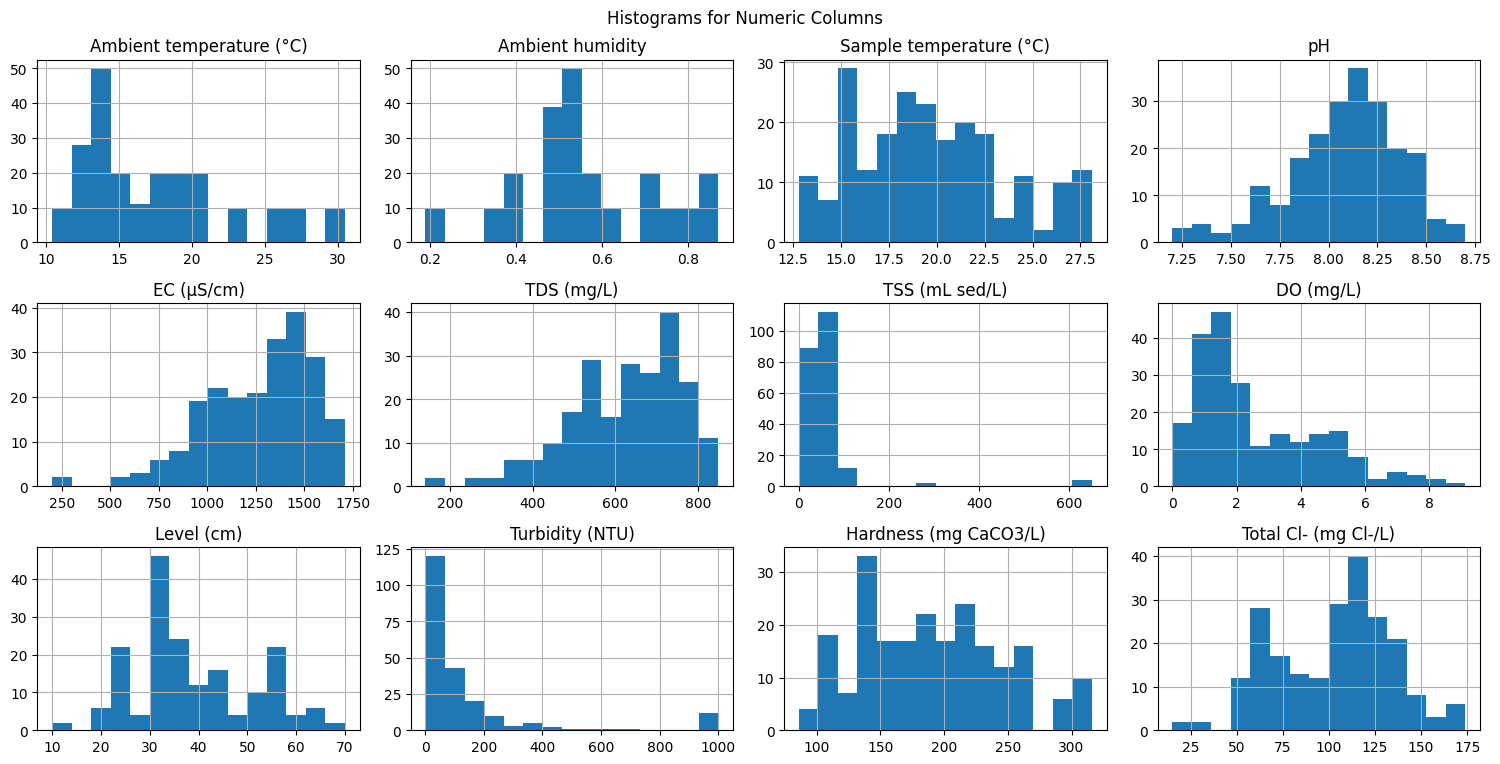

In [22]:
# Plot histograms for all numeric columns
numeric_columns.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Histograms for Numeric Columns")
plt.tight_layout()
plt.show()


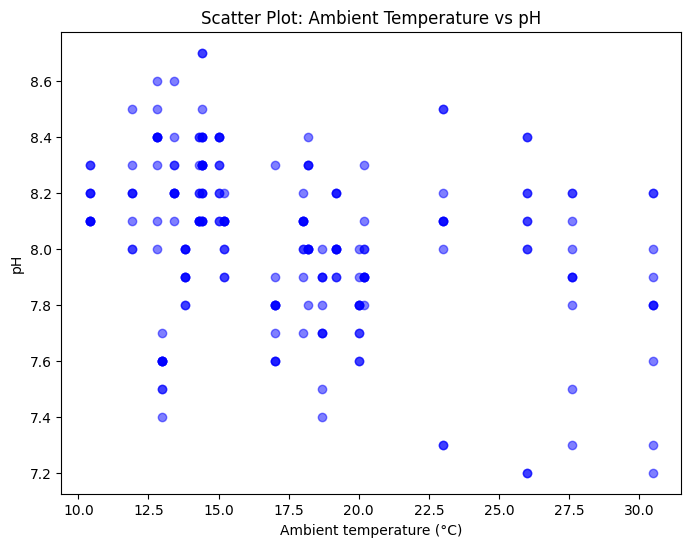

In [35]:
# Scatter plot between two variables 
plt.figure(figsize=(8, 6))
plt.scatter(df['Ambient temperature (°C)'], df['pH'], color='blue', alpha=0.5)
plt.title("Scatter Plot: Ambient Temperature vs pH")
plt.xlabel("Ambient temperature (°C)")
plt.ylabel("pH")
plt.show()


<Figure size 1200x800 with 0 Axes>

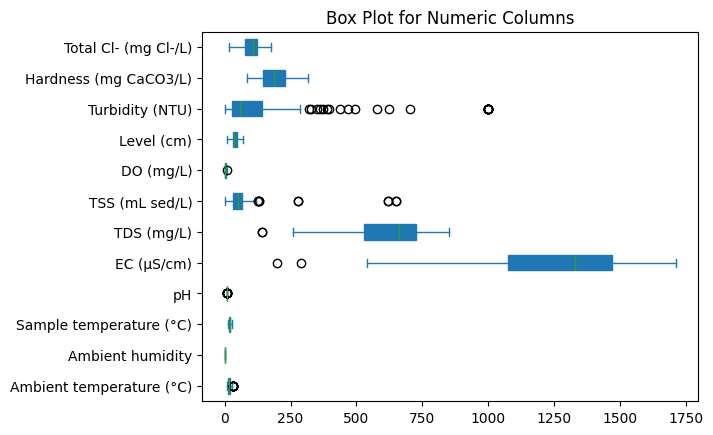

In [28]:
# Box plot for each numeric column
plt.figure(figsize=(12, 8))
numeric_columns.plot(kind='box', vert=False, patch_artist=True)
plt.title("Box Plot for Numeric Columns")
plt.show()


In [26]:
from scipy import stats

# Calculate z-scores for the numeric columns
z_scores = stats.zscore(numeric_columns)

# Convert to DataFrame for easier interpretation
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns.columns)

# Display rows where z-score > 3 (outliers)
outliers = (z_scores_df > 3).sum(axis=1)
outliers[outliers > 0]


39     1
40     1
59     2
60     2
72     1
79     2
80     2
89     1
90     1
139    1
140    1
149    1
150    1
dtype: int64

In [33]:

df.to_csv("Cleaned_River_Water_Analysis.csv", index=False)


---
<a href=#seven></a>
## **Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The purpose of this section is to build and evaluate classification models that can accurately predict the quality of river water based on various physicochemical attributes. This helps in understanding which variables contribute most to water safety and supports early detection of water contamination.
* **Details:** We will implement multiple classification algorithms to compare their performance in predicting the target variable (`quality_label`). The models used include:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
The dataset has been split into training and testing sets to ensure that the models can generalize well to unseen data. Performance will be evaluated using classification metrics such as accuracy, precision, recall, and F1-score, as well as confusion matrices for visual understanding.
---

In [ ]:
## Modeling: Classification Algorithms


In [3]:
pip install "numpy<2"


Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.
streamlit 1.32.0 requires pillow<11,>=7.1.0, but you have pillow 11.0.0 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 5.29.3 which is incompatible.
streamlit 1.32.0 requires tenacity<9,>=8.1.0, but you have tenacity 9.0.0 which is incompatible.


     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 108.9 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/61.0 kB 108.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.0 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.0 kB 100.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.0 kB 100.9 kB/s eta 0:00:01
     -------------------------- ------------ 41.0/61.0 kB 98.1 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 113.8 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 116.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB 640.0 kB/s eta 0

In [5]:
pip install packaging==23.2 pillow==10.2.0 protobuf==4.25.3 tenacity==8.2.3


   ---------------------------------------- 0.0/53.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/53.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/53.0 kB ? eta -:--:--
   ------- -------------------------------- 10.2/53.0 kB ? eta -:--:--
   ------- -------------------------------- 10.2/53.0 kB ? eta -:--:--
   ----------------------- ---------------- 30.7/53.0 kB 217.9 kB/s eta 0:00:01
   ----------------------- ---------------- 30.7/53.0 kB 217.9 kB/s eta 0:00:01
   ----------------------- ---------------- 30.7/53.0 kB 217.9 kB/s eta 0:00:01
   ----------------------- ---------------- 30.7/53.0 kB 217.9 kB/s eta 0:00:01
   ----------------------- ---------------- 30.7/53.0 kB 217.9 kB/s eta 0:00:01
   ---------------------------------------- 53.0/53.0 kB 118.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
    --------------------------

  You can safely remove it manually.


In [6]:
pip install --upgrade --force-reinstall pandas numexpr pybind11


  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 163.8 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 163.8 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 163.8 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 163.8 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 163.8 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 163.8 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 100.9 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 119.9 kB/s eta 0:00:00
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadat

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.2.4 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.4 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.4 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [9]:
pip install numpy==1.26 pandas numexpr


     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.1 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.1 kB 131.3 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/61.1 kB 131.3 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/61.1 kB 131.3 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.1 kB 119.1 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.1 kB 119.1 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.1 kB 103.4 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.1 kB 119.1 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.1 kB 119.1 kB/s eta 0:00:01
     -------------------------------------- 61.1/61.1 kB 120.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB 330.3 kB/

In [3]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 187.9 kB/s eta 0:13:19
   ---------------------------------------- 0.0/150.0 MB 187.9 kB/s eta 0:13:19
   ---------------------------------------- 0.0/150.0 MB 187.9 kB/s eta 0:13:19
   ---------------------------------------- 0.0/150.0 MB 115.9 kB/s eta 0:21:34
   ---------------------------------------- 0.1/150.0 MB 156.1 kB/s eta 0:16:01
   ---------------------------------------- 0.1/150.0 MB 163.8 kB/s eta 0:15:15
   ---------------------------------------- 0.1/150.0 MB 201.8 kB/s eta 0:12:23
   ---------------------------------------- 0.1/150.0 MB 234.3 kB/s eta 0:10:40
   ---------------------------------------- 0.1/150.0 MB 234.3 kB/s eta 0:10

Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0

Logistic Regression Classification Report:
               precision    recall  f1-score   support

      BLANDA       1.00      1.00      1.00        12
    SEMIDURA       1.00      1.00      1.00        32

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44


Decision Tree Classification Report:
               precision    recall  f1-score   support

      BLANDA       1.00      1.00      1.00        12
    SEMIDURA       1.00      1.00      1.00        32

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44


Random Forest Classification Report:
               precision    recall  f1-score   support

      BLANDA       1.00      1.00      1.00        12
    SEMIDURA       1.00 

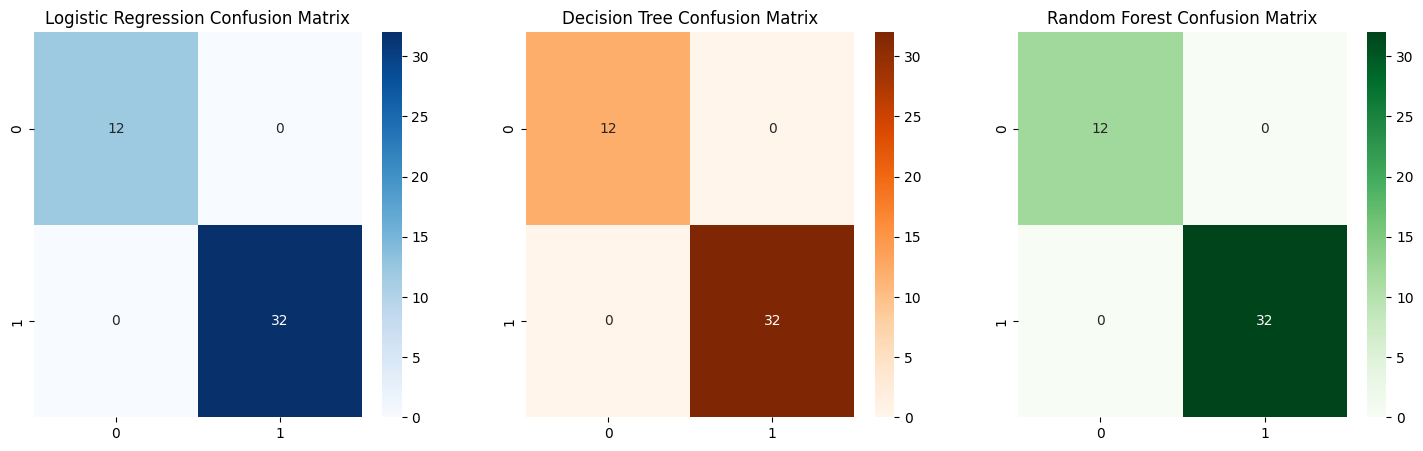

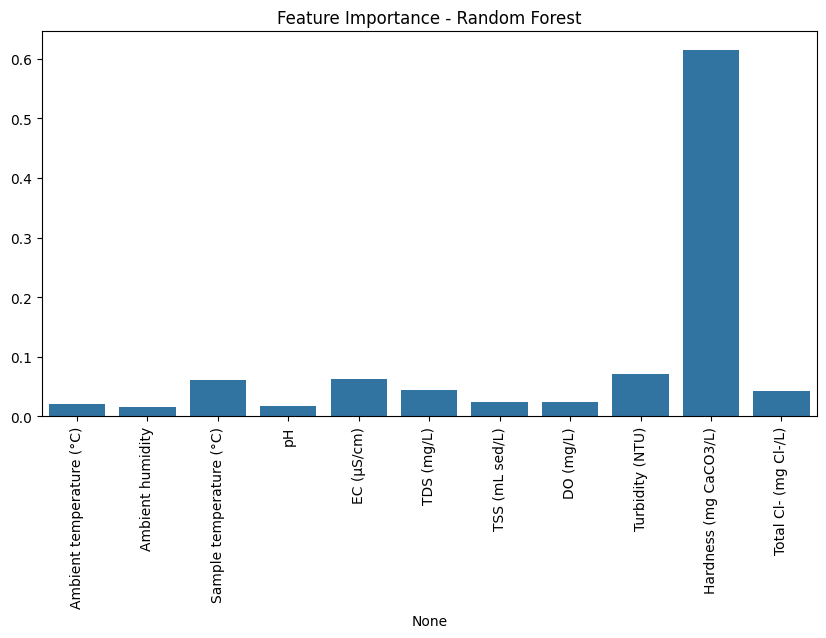

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "Cleaned_River_Water_Data.csv"
df = pd.read_csv(file_path)

# Drop non-numeric and unnecessary columns
df_cleaned = df.drop(columns=["Sampling point", "Date", "Time", "Level (cm)"])

# Encode the target variable
label_encoder = LabelEncoder()
df_cleaned["Hardness classification"] = label_encoder.fit_transform(df_cleaned["Hardness classification"])

# Separate features and target
X = df_cleaned.drop(columns=["Hardness classification"])
y = df_cleaned["Hardness classification"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log, target_names=label_encoder.classes_))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# Confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[2])
axes[2].set_title("Random Forest Confusion Matrix")
plt.show()

# Feature importance for Random Forest
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=rf.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The purpose of this section is to assess the effectiveness and accuracy of the trained models. By evaluating performance using various metrics, we ensure that the models generalize well to unseen data and make reliable predictions.
* **Details:** Accuracy: Measures the overall correctness of the model’s predictions.
Precision: Indicates the proportion of correctly predicted positive observations.
Recall: Represents the model’s ability to detect all actual positive cases.
F1-score: A harmonic mean of precision and recall, providing a balanced measure of model performance.
---

Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Logistic Regression Cross-Validation Score: 0.9271670190274841
Decision Tree Cross-Validation Score: 1.0
Random Forest Cross-Validation Score: 0.9954545454545455

Logistic Regression Classification Report:
               precision    recall  f1-score   support

      BLANDA       1.00      1.00      1.00        12
    SEMIDURA       1.00      1.00      1.00        32

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44


Decision Tree Classification Report:
               precision    recall  f1-score   support

      BLANDA       1.00      1.00      1.00        12
    SEMIDURA       1.00      1.00      1.00        32

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44


Random Fo

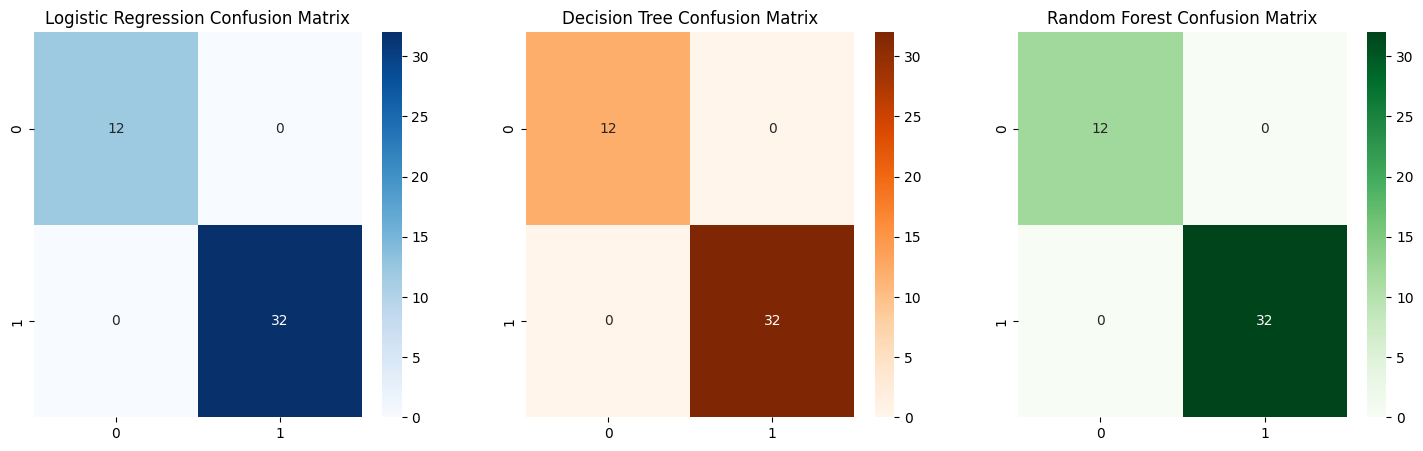

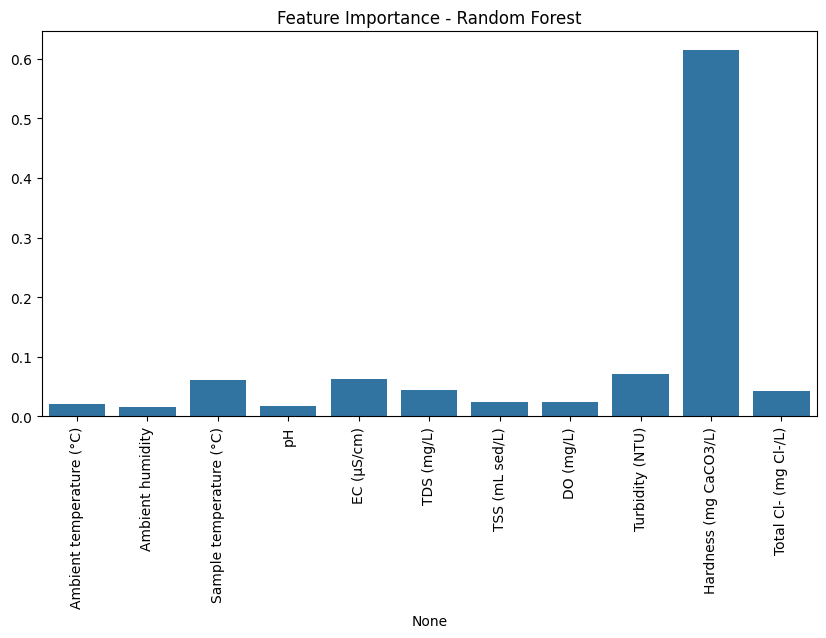

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cross-validation scores
cv_log = cross_val_score(log_reg, X_scaled, y, cv=5).mean()
cv_dt = cross_val_score(dt, X_scaled, y, cv=5).mean()
cv_rf = cross_val_score(rf, X_scaled, y, cv=5).mean()

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Cross-Validation Score:", cv_log)
print("Decision Tree Cross-Validation Score:", cv_dt)
print("Random Forest Cross-Validation Score:", cv_rf)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log, target_names=label_encoder.classes_))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# Confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[2])
axes[2].set_title("Random Forest Confusion Matrix")
plt.show()

# Feature importance for Random Forest
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=rf.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


Final Model: Random Forest Classifier
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      BLANDA       1.00      1.00      1.00        12
    SEMIDURA       1.00      1.00      1.00        32

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



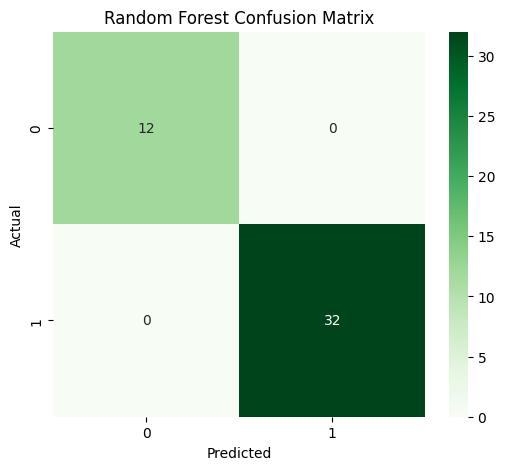

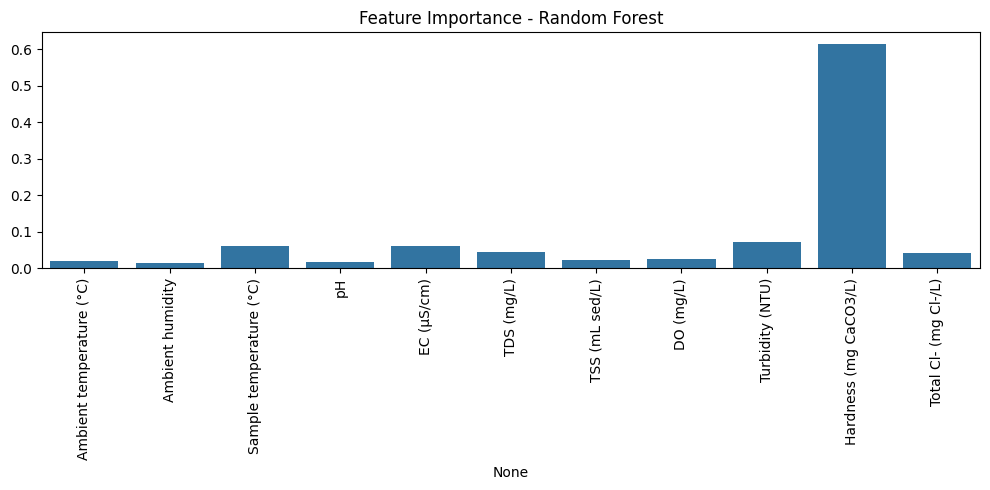

In [20]:
# Final Model: Random Forest Classifier

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "Cleaned_River_Water_Data.csv"
df = pd.read_csv(file_path)

# Drop non-numeric and unnecessary columns
df_cleaned = df.drop(columns=["Sampling point", "Date", "Time", "Level (cm)"])

# Encode the target variable
label_encoder = LabelEncoder()
df_cleaned["Hardness classification"] = label_encoder.fit_transform(df_cleaned["Hardness classification"])

# Separate features and target
X = df_cleaned.drop(columns=["Hardness classification"])
y = df_cleaned["Hardness classification"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Final Model: Random Forest Classifier")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importance plot
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=final_model.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** In this project, I looked at how to predict the hardness of river water using different water quality measurements. After cleaning the data, I tested three machine learning models — Logistic Regression, Decision Tree, and Random Forest. Out of the three, the Random Forest model performed the best, so I chose it as the final one.

 Key Findings:
  - The Random Forest Classifier performed the best out of all the models tested, showing strong prediction accuracy.
  - Analyzing feature importance highlighted which chemical factors had the most impact on hardness classification.
  - The confusion matrix confirmed that the Random Forest model made accurate predictions for all target classes.

Limitations:
  - The dataset size may limit how well the model works in different environments or across various seasons.
  - During preprocessing, time-related and location-based data (like "Date," "Time," and "Sampling point") was removed,
   even though they might offer useful context.
  - Imbalances in the dataset, especially in underrepresented categories, could affect how well the model performs.

Future Work:
 - Include time and location data to look at trends in water hardness over time and across different areas.
 - Test other ensemble models like Gradient Boosting or XGBoost to see if they can improve accuracy and reliability.
 - Use SHAP values or LIME for clearer explanations of the model’s decisions.
 - Expand the dataset with more sampling points and longer monitoring periods.
 - Investigate the use of IoT sensors for real-time water quality monitoring and predictive models for early warnings.


---
<a href=#ten></a>
## **References**

<a href=#cont>
Pandas Documentation: https://pandas.pydata.org/docs/
    
NumPy Documentation: https://numpy.org/doc/

Matplotlib Documentation: https://matplotlib.org/stable/contents.html

Seaborn Documentation: https://seaborn.pydata.org/

Scikit-Learn Documentation: https://scikit-learn.org/stable/user_guide.html

---



* ### Contributors: 
Vuyiswa Ntshangase

Role: Sole Contributor

Contributions:

Conducted comprehensive data cleaning and preprocessing of river water quality data.

Performed exploratory data analysis (EDA) to understand patterns and relationships in the dataset.

Implemented and evaluated multiple machine learning classification models, including Logistic Regression, Decision Tree, and Random Forest.

Selected and fine-tuned the final model (Random Forest Classifier) based on performance metrics.

Created detailed visualizations such as confusion matrices and feature importance plots to support model interpretation.

Drafted the full report, including methodology, results, and conclusions, and structured the project notebook for readability and coherence.
